In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/ML'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'fresa' in filename:
      y.append(0) #indice 0 fresa
    elif 'naranja' in filename: #indice 1 naranja
      y.append(1)
    elif 'pera' in filename: #indice 2 pera
      y.append(2)
    elif 'tomate' in filename: #indice 3 tomate
      y.append(3)
    elif 'platano' in filename: #indice 4 platano
      y.append(4)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert('RGB') #Convierte la imagen en RGB(3canales)
        img = img.resize((128, 128))  # Redimensiona la imagen
        img_array = np.array(img) / 128.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas

In [3]:
type(image_list)

list

In [4]:
type(image_list[0])

numpy.ndarray

In [5]:
image_list[0]

array([[[1.734375 , 1.734375 , 1.7421875],
        [1.734375 , 1.734375 , 1.7421875],
        [1.734375 , 1.734375 , 1.7421875],
        ...,
        [1.734375 , 1.734375 , 1.7421875],
        [1.734375 , 1.734375 , 1.7421875],
        [1.734375 , 1.734375 , 1.7421875]],

       [[1.9921875, 1.9921875, 1.9921875],
        [1.9921875, 1.9921875, 1.9921875],
        [1.9921875, 1.9921875, 1.9921875],
        ...,
        [1.9921875, 1.9921875, 1.9921875],
        [1.9921875, 1.9921875, 1.9921875],
        [1.9921875, 1.9921875, 1.9921875]],

       [[1.984375 , 1.984375 , 1.984375 ],
        [1.984375 , 1.984375 , 1.984375 ],
        [1.984375 , 1.984375 , 1.984375 ],
        ...,
        [1.984375 , 1.984375 , 1.984375 ],
        [1.984375 , 1.984375 , 1.984375 ],
        [1.984375 , 1.984375 , 1.984375 ]],

       ...,

       [[1.984375 , 1.984375 , 1.96875  ],
        [1.984375 , 1.984375 , 1.96875  ],
        [1.984375 , 1.984375 , 1.96875  ],
        ...,
        [1.9921875, 1.9765

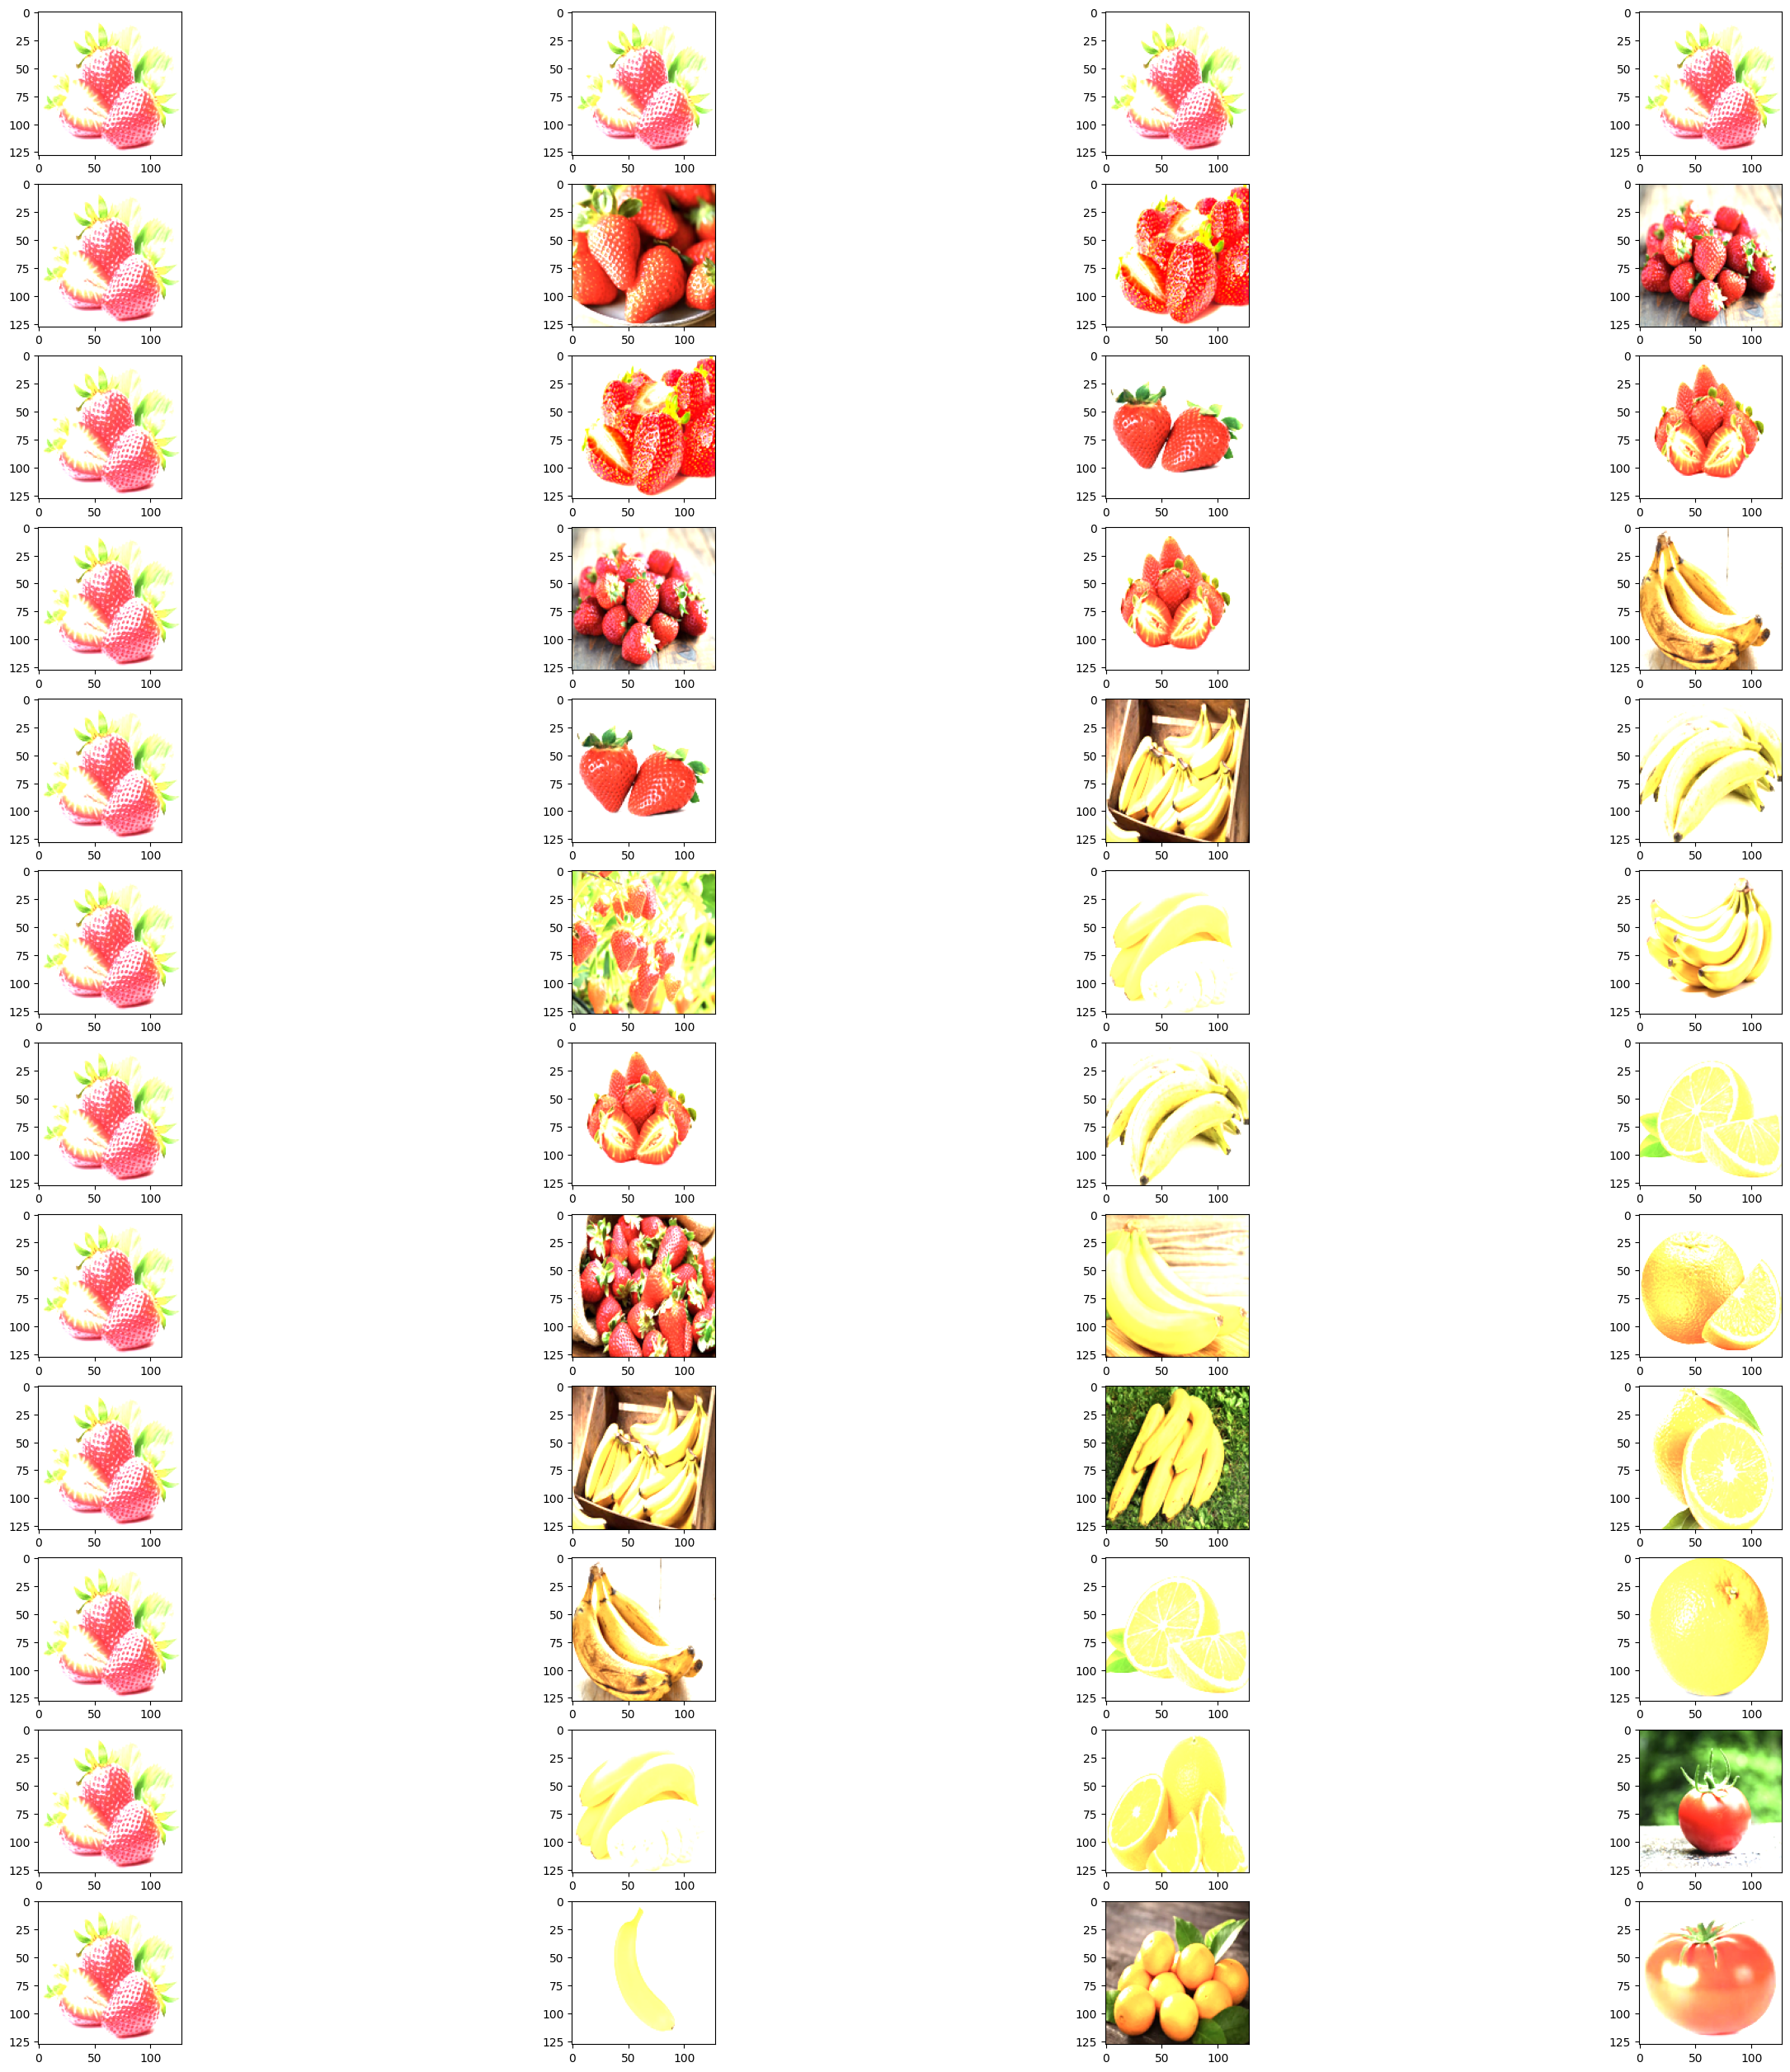

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img = mpimg.imread('your_image.png')
import matplotlib.pyplot as plt
nImagenes = len(image_list)
filas = nImagenes // 4
fig, axes = plt.subplots(filas,4, figsize=(32,32))
for f in range(filas):
  for c in range(4):
    axes[f,c].imshow(image_list[f*c])

#axes[0,0].imshow(image_list_train[0])
#for i,ax in enumerate(image_list_train):
#    ax.imshow(image_list_train[i].flat)
#imgplot = plt.imshow(img)
#plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
y_test

[1, 4, 2, 0, 0, 4, 3, 2, 3, 1]

In [9]:
y_train

[0,
 2,
 3,
 1,
 4,
 2,
 3,
 0,
 4,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 2,
 4,
 4,
 2,
 4,
 0,
 3,
 0,
 1,
 4,
 1,
 3,
 2,
 0,
 4,
 3,
 4,
 1,
 3,
 0,
 2,
 1,
 2,
 0]

In [10]:
#Carga de librerias
import tensorflow as tf
import keras
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten
keras.utils.set_random_seed(812)
np.random.seed(812)
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5,activation='softmax'))

In [12]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[0,
 2,
 3,
 1,
 4,
 2,
 3,
 0,
 4,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 2,
 4,
 4,
 2,
 4,
 0,
 3,
 0,
 1,
 4,
 1,
 3,
 2,
 0,
 4,
 3,
 4,
 1,
 3,
 0,
 2,
 1,
 2,
 0]

In [14]:
for i, img in enumerate(X_train):
    print(f"Imagen {i} tiene forma: {np.array(img).shape}")

Imagen 0 tiene forma: (128, 128, 3)
Imagen 1 tiene forma: (128, 128, 3)
Imagen 2 tiene forma: (128, 128, 3)
Imagen 3 tiene forma: (128, 128, 3)
Imagen 4 tiene forma: (128, 128, 3)
Imagen 5 tiene forma: (128, 128, 3)
Imagen 6 tiene forma: (128, 128, 3)
Imagen 7 tiene forma: (128, 128, 3)
Imagen 8 tiene forma: (128, 128, 3)
Imagen 9 tiene forma: (128, 128, 3)
Imagen 10 tiene forma: (128, 128, 3)
Imagen 11 tiene forma: (128, 128, 3)
Imagen 12 tiene forma: (128, 128, 3)
Imagen 13 tiene forma: (128, 128, 3)
Imagen 14 tiene forma: (128, 128, 3)
Imagen 15 tiene forma: (128, 128, 3)
Imagen 16 tiene forma: (128, 128, 3)
Imagen 17 tiene forma: (128, 128, 3)
Imagen 18 tiene forma: (128, 128, 3)
Imagen 19 tiene forma: (128, 128, 3)
Imagen 20 tiene forma: (128, 128, 3)
Imagen 21 tiene forma: (128, 128, 3)
Imagen 22 tiene forma: (128, 128, 3)
Imagen 23 tiene forma: (128, 128, 3)
Imagen 24 tiene forma: (128, 128, 3)
Imagen 25 tiene forma: (128, 128, 3)
Imagen 26 tiene forma: (128, 128, 3)
Imagen 27 t

In [15]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
#Verificamos el cambio
y_train

array([0, 2, 3, 1, 4, 2, 3, 0, 4, 1, 1, 1, 0, 3, 3, 2, 2, 4, 4, 2, 4, 0,
       3, 0, 1, 4, 1, 3, 2, 0, 4, 3, 4, 1, 3, 0, 2, 1, 2, 0])

In [17]:
type(y_train)

numpy.ndarray

In [18]:
y_train.shape

(40,)

In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes=5)

In [20]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
ajuste = %time model.fit(X_train,y_train,epochs=70,batch_size=16)
ajuste

Epoch 1/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1937 - loss: 6.1793
Epoch 2/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2062 - loss: 4.5300
Epoch 3/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3500 - loss: 1.5569
Epoch 4/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4641 - loss: 1.4155
Epoch 5/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8141 - loss: 0.9077
Epoch 6/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7109 - loss: 0.6676
Epoch 7/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9078 - loss: 0.3785 
Epoch 8/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.1557
Epoch 9/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9797 - loss: 0.0843
Epoch 10/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0343
Epoch 11/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0256
Epoch 12/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0133
Ep

In [21]:
%time y_train

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [22]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [23]:
y_test = keras.utils.to_categorical(y_test, num_classes=5)

In [24]:
#Verificamos su forma
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [25]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


In [26]:
#Revisamos el resultado
y_pred

array([[2.7881019e-06, 9.9335700e-01, 8.0896236e-05, 1.0650305e-06,
        6.5581910e-03],
       [5.0556572e-08, 7.7453363e-03, 1.2960543e-01, 2.2773499e-09,
        8.6264920e-01],
       [1.0759621e-07, 4.0445555e-02, 1.3982311e-01, 4.5719103e-06,
        8.1972665e-01],
       [1.7668547e-02, 2.6589185e-03, 1.8588308e-06, 9.7966880e-01,
        1.8892648e-06],
       [1.9955952e-01, 1.0264178e-03, 6.1319611e-08, 7.9941356e-01,
        3.5210721e-07],
       [4.3967825e-06, 5.0800678e-05, 2.6987502e-01, 3.4073739e-09,
        7.3006976e-01],
       [7.8344288e-05, 7.4736190e-01, 7.6648780e-07, 2.5255901e-01,
        1.2549579e-09],
       [3.1307020e-06, 6.3316296e-03, 9.4833446e-01, 1.2520843e-04,
        4.5205519e-02],
       [1.6788608e-01, 5.0687023e-02, 9.0205781e-03, 7.3471791e-01,
        3.7688401e-02],
       [1.8766611e-03, 9.7682583e-01, 4.8333122e-03, 7.6500219e-05,
        1.6387617e-02]], dtype=float32)

In [27]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [28]:
type(y_pred)

numpy.ndarray

In [29]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
type(y_test)

numpy.ndarray

In [31]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 4, 4, 3, 3, 4, 1, 2, 3, 1])

In [32]:
y_test = np.argmax(y_test, axis=1)
y_test

array([1, 4, 2, 0, 0, 4, 3, 2, 3, 1])

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.6
Precisión por clase: [0.         0.66666667 1.         0.33333333 0.66666667] -> 0.5333333333333333
Sensibilidad por clase: [0.  1.  0.5 0.5 1. ] -> 0.6
F1 Score por clase: [0.         0.8        0.66666667 0.4        0.8       ] -> 0.5333333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
y_test

array([1, 4, 2, 0, 0, 4, 3, 2, 3, 1])

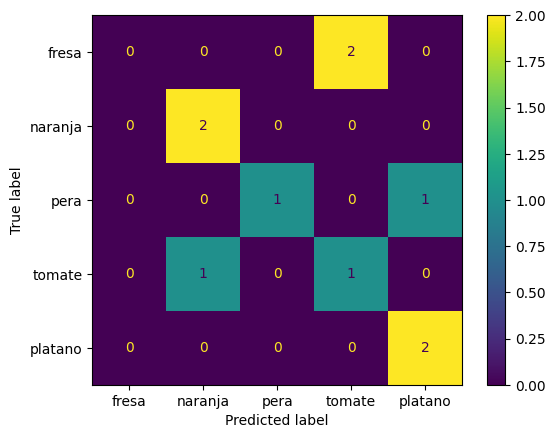

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['fresa','naranja','pera','tomate','platano']
disp.plot()

In [36]:
y_test

array([1, 4, 2, 0, 0, 4, 3, 2, 3, 1])

In [37]:
y_pred

array([1, 4, 4, 3, 3, 4, 1, 2, 3, 1])

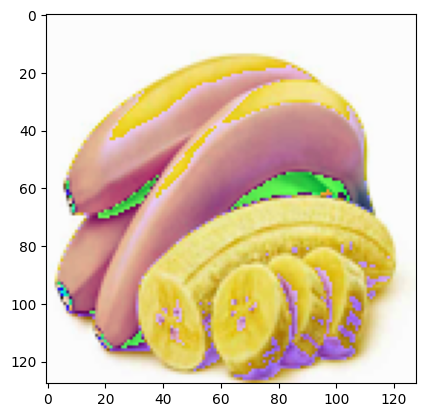

In [38]:
import matplotlib.pyplot as plt
img_array = (X_test[1] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)